In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # statistical plotting library
import pylab as p
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
!pip install keras


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
characters_df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\character.csv')
weapons_df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\weapons.csv')

In [4]:
characters_df

,Character Name,Gender,Age,Survival Ability,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Level 8
0,Andrew,M,42,Armor Specialist,decreased by 2%,decreased by 4%,decreased by 6%,decreased by 8%,Suit.,decreased by 10%,Bannaer,decreased by 12%
1,A124,F,18,Thrill of Battle,"EP into HP, CD: 90s","EP into HP, CD: 80s","EP into HP, CD: 75s","EP into HP, CD: 70s",Suit,"EP into HP, CD: 65s",Bannaer,"EP into HP, CD: 60s"
2,Rafael,M,31,Dead Silent,"ot be revealed on the mini-map for 8s, CD 90s","ot be revealed on the mini-map for 8s, CD 80s","ot be revealed on the mini-map for 8s, CD 70s","ot be revealed on the mini-map for 8s, CD 60s",Suit,"ot be revealed on the mini-map for 8s, CD 50s",Bannaer,"ot be revealed on the mini-map for 8s, CD 40s"
3,Laura,F,24,Sharp Shooter,Accuracy increase 10%-Scope in,Accuracy increase 14%-Scope in,Accuracy increase 18%-Scope in,Accuracy increase 22%-Scope in,Suit,Accuracy increase 28%-Scope in,Bannaer,Accuracy increase 30%-Scope in
4,Shimada Hayato,M,20,Bushido,"HP is decrease 10%,increase 7.5% armor penetra...","HP is decrease 10%,increase 8% armor penetration","HP is decrease 10%,increase 8.5% armor penetra...","HP is decrease 10%,increase 9% armor penetration",Suit,"HP is decrease 10%,increase 9.5% armor penetra...",Bannaer,"HP is decrease 10%,increase 10% armor penetration"
5,Moco,F,20,Hacker's Eye,Tag enemies shot for 2 seconds.,Tag enemies shot for 2.5 seconds.,Tag enemies shot for 3 seconds.,Tag enemies shot for 3.5 seconds.,Suit,Tag enemies shot for 4 seconds.,Bannaer,Tag enemies shot for 5 seconds.
6,Wukong,Unknown,Unknown,Camouflage,cool down is 300 seconds,cool down is 280 seconds,cool down is 260 seconds,cool down is 240 seconds,Suit,cool down is 220 seconds,Bannaer,cool down is 200 seconds
7,Antonio,Unknown,30,Gangster's Spirit,Receive 10 extra HP when the round starts,Receive 15 extra HP when the round starts,Receive 20 extra HP when the round starts,Receive 25 extra HP when the round starts,Suit,Receive 30 extra HP when the round starts,Bannaer,Receive 35 extra HP when the round starts
8,Caroline,F,17,Agility,shotgun movement speed is increased by 3%,shotgun movement speed is increased by 4%,shotgun movement speed is increased by 5%,shotgun movement speed is increased by 6%,Suit,shotgun movement speed is increased by 7%,Bannaer,shotgun movement speed is increased by 8%
9,Miguel,M,26,Crazy Slayer,Gain 20 EP for each kill,Gain 25 EP for each kill,Gain 30 EP for each kill,Gain 35 EP for each kill,Suit,Gain 40 EP for each kill,Bannaer,Gain 45 EP for each kill


In [5]:
weapons_df

,Weapon_Name,Weapon_type,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION,ATTACHABLES
0,RGS50,LAUNCHER,90,27,100,62,3,90,65,0,Nothing
1,MGL140,LAUNCHER,90,33,51,76,5,90,65,0,MAGAZINE
2,M79,LAUNCHER,90,27,51,62,1,90,65,0,Nothing
3,GATLING,LMG,55,56,84,62,1200,79,32,0,Nothing
4,M249,LMG,57,59,77,48,100,56,58,0,Nothing
5,CG15,SMG,50,69,71,62,20,60,63,0,"FOREGRIP,MAGAZINE"
6,P90,SMG,48,75,27,48,50,37,63,0,"MAGAZINE,SCOPE,STOCK"
7,MP40,SMG,48,83,22,48,20,17,63,0,"STOCK,MAGAZINE"
8,UMP,SMG,49,75,36,77,48,36,79,63,"SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE"
9,MP5,SMG,48,76,41,77,48,54,66,0,"SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE"


In [6]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character Name    28 non-null     object
 1   Gender            28 non-null     object
 2   Age               28 non-null     object
 3   Survival Ability  28 non-null     object
 4   Level 1           28 non-null     object
 5   Level 2           28 non-null     object
 6   Level 3           28 non-null     object
 7   Level 4           28 non-null     object
 8   Level 5           28 non-null     object
 9   Level 6           28 non-null     object
 10  Level 7           28 non-null     object
 11  Level 8           28 non-null     object
dtypes: object(12)
memory usage: 2.8+ KB


In [7]:
weapons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Weapon_Name        44 non-null     object
 1   Weapon_type        44 non-null     object
 2   DAMAGE             44 non-null     int64 
 3   RATE_OF_FIRE       44 non-null     int64 
 4   RANGE              44 non-null     int64 
 5   RELOAD SPEED       44 non-null     int64 
 6   MAGAZINE           44 non-null     int64 
 7   ACCURACY           44 non-null     int64 
 8   MOVEMENT_SPEED     44 non-null     int64 
 9   ARMOR_PENETRATION  44 non-null     int64 
 10  ATTACHABLES        44 non-null     object
dtypes: int64(8), object(3)
memory usage: 3.9+ KB


In [8]:
characters_df.describe()

,Character Name,Gender,Age,Survival Ability,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Level 8
count,28,28,28,28,28,28,28,28,28,28,28,28
unique,28,3,17,28,28,28,28,28,3,28,1,28
top,Andrew,F,31,Armor Specialist,decreased by 2%,decreased by 4%,decreased by 6%,decreased by 8%,Suit,decreased by 10%,Bannaer,decreased by 12%
freq,1,14,3,1,1,1,1,1,19,1,28,1


In [9]:
weapons_df.describe()

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,66.795455,47.250000,50.159091,44.454545,45.840909,46.954545,65.750000,6.750000
std,20.547822,17.729394,29.631020,22.451451,179.203787,27.178099,10.796479,19.274184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,53.000000,33.000000,25.750000,41.000000,4.500000,29.750000,62.000000,0.000000
50%,61.500000,44.000000,55.500000,48.000000,13.500000,51.000000,63.000000,0.000000
75%,90.000000,59.250000,76.250000,62.000000,30.000000,57.250000,73.500000,0.000000
max,100.000000,83.000000,100.000000,83.000000,1200.000000,90.000000,88.000000,67.000000


In [10]:
print(weapons_df.shape)
print(characters_df.shape)

(44, 11)
(28, 12)


In [11]:
characters_df.isnull().sum()

Character Name      0
Gender              0
Age                 0
Survival Ability    0
Level 1             0
Level 2             0
Level 3             0
Level 4             0
Level 5             0
Level 6             0
Level 7             0
Level 8             0
dtype: int64

In [12]:
weapons_df.isnull().sum()

Weapon_Name          0
Weapon_type          0
DAMAGE               0
RATE_OF_FIRE         0
RANGE                0
RELOAD SPEED         0
MAGAZINE             0
ACCURACY             0
MOVEMENT_SPEED       0
ARMOR_PENETRATION    0
ATTACHABLES          0
dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_16212\352117752.py:11: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1,figsize=(12, 12))


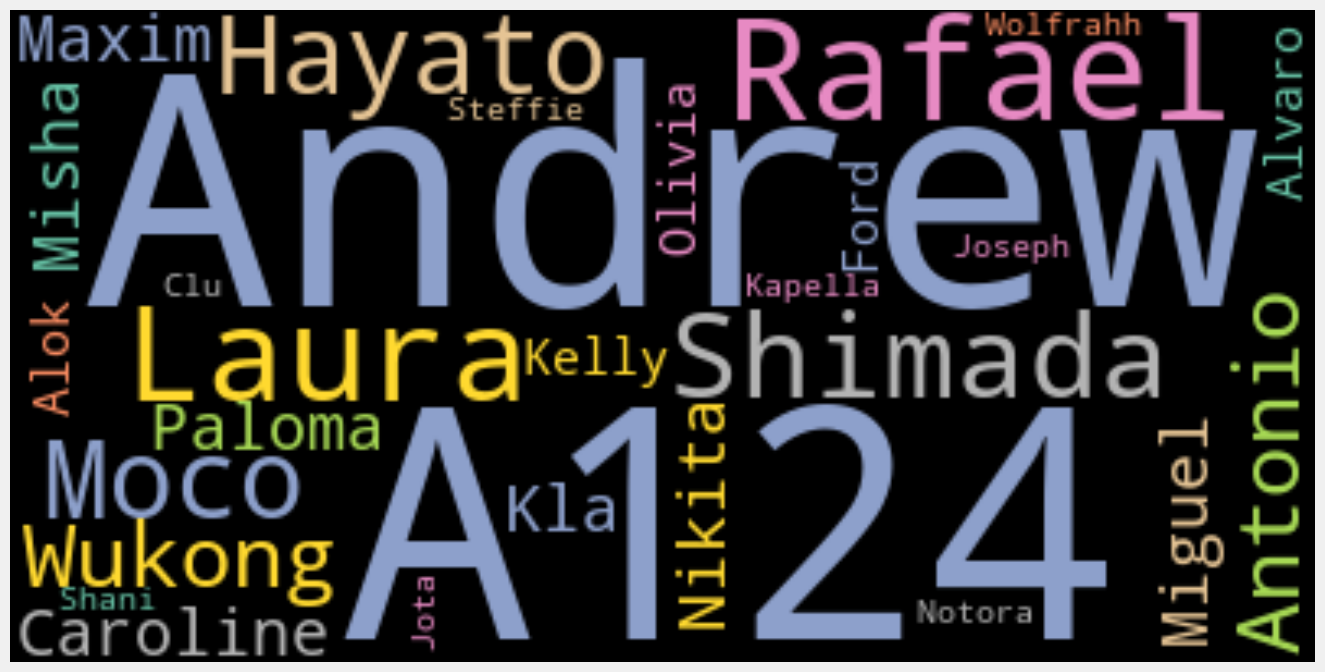

<Figure size 1000x600 with 0 Axes>

In [13]:
# Word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in characters_df['Character Name'])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=400,colormap='Set2', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

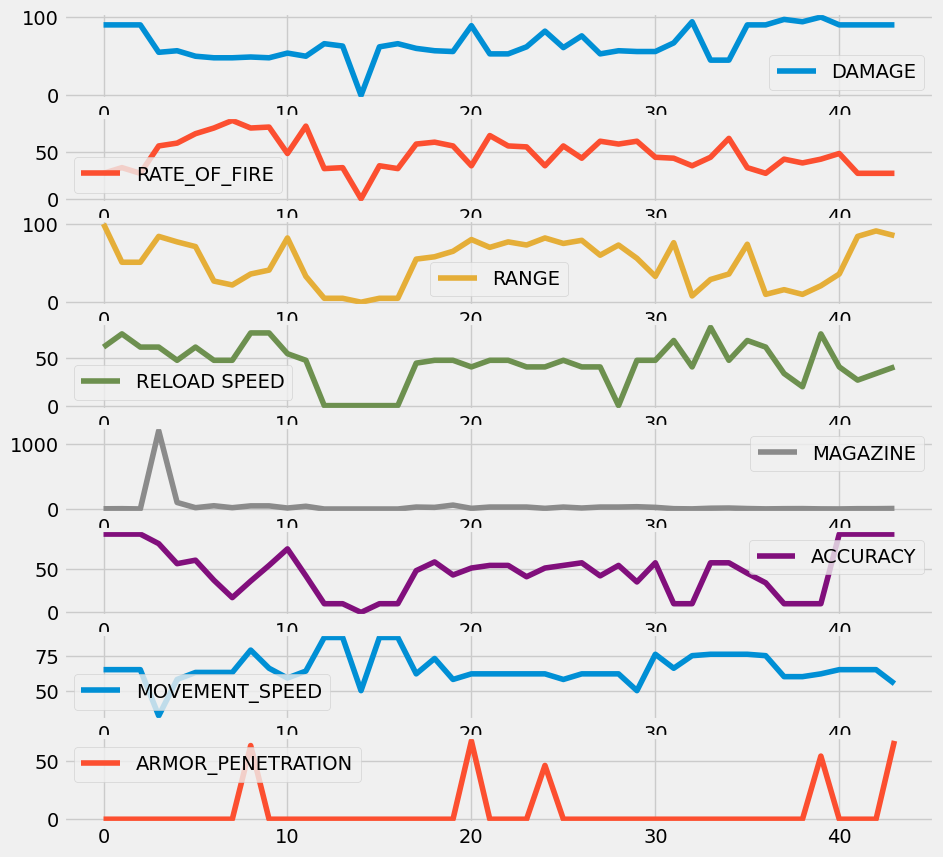

In [14]:
weapons_df.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

In [15]:
characters_df['Age'].hist(figsize=(10,10), bins=20)

<Axes: >

In [16]:
weapons_df['DAMAGE'].hist(figsize=(10,5), bins=20)

<Axes: >

In [17]:
weapons_df['RATE_OF_FIRE'].hist(figsize=(10,5), bins=20)

<Axes: >

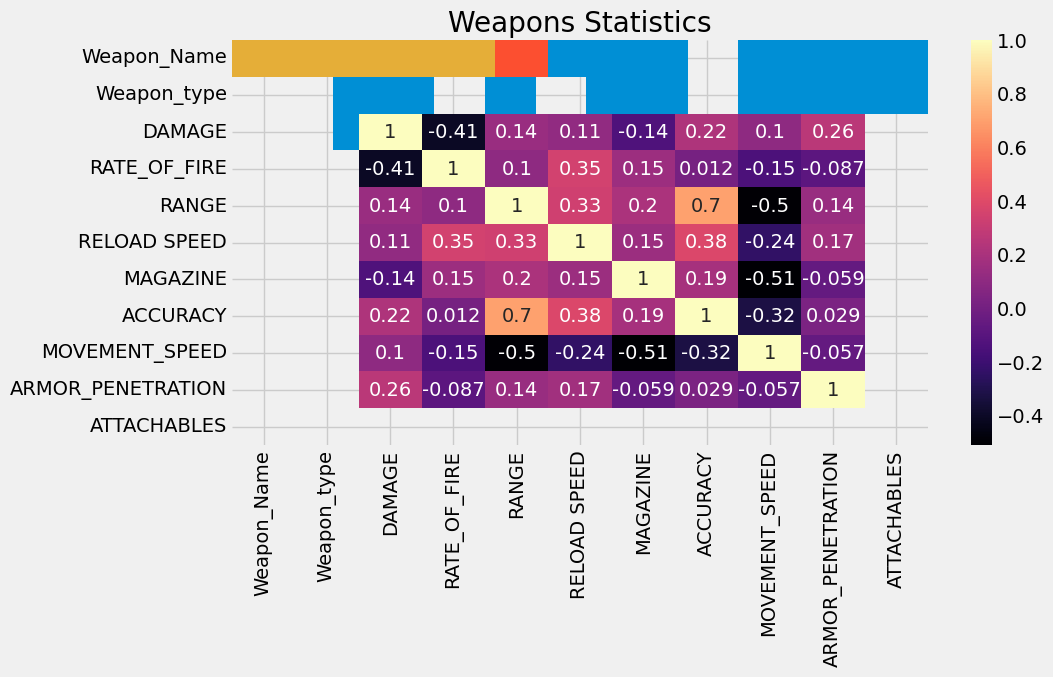

In [19]:
weapons_df = weapons_df.apply(pd.to_numeric, errors='coerce')
sns.heatmap(weapons_df.corr(), annot=True, cmap='magma')
plt.title('Weapons Statistics')
plt.show()

In [20]:
weapons_df.iloc[:,2:10]

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,90,27,100,62,3,90,65,0
1,90,33,51,76,5,90,65,0
2,90,27,51,62,1,90,65,0
3,55,56,84,62,1200,79,32,0
4,57,59,77,48,100,56,58,0
5,50,69,71,62,20,60,63,0
6,48,75,27,48,50,37,63,0
7,48,83,22,48,20,17,63,0
8,49,75,36,77,48,36,79,63
9,48,76,41,77,48,54,66,0


In [21]:
w_df=weapons_df.iloc[:,2:10]
w_df

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,90,27,100,62,3,90,65,0
1,90,33,51,76,5,90,65,0
2,90,27,51,62,1,90,65,0
3,55,56,84,62,1200,79,32,0
4,57,59,77,48,100,56,58,0
5,50,69,71,62,20,60,63,0
6,48,75,27,48,50,37,63,0
7,48,83,22,48,20,17,63,0
8,49,75,36,77,48,36,79,63
9,48,76,41,77,48,54,66,0


In [22]:
def norm_func(i):
     x = (i - i.min()) / (i.max() - i.min())
     return (x)

In [23]:
w_df.iloc[ :, 0:8]

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,90,27,100,62,3,90,65,0
1,90,33,51,76,5,90,65,0
2,90,27,51,62,1,90,65,0
3,55,56,84,62,1200,79,32,0
4,57,59,77,48,100,56,58,0
5,50,69,71,62,20,60,63,0
6,48,75,27,48,50,37,63,0
7,48,83,22,48,20,17,63,0
8,49,75,36,77,48,36,79,63
9,48,76,41,77,48,54,66,0


In [24]:
w_df.iloc[ :, 7]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8     63
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20    67
21     0
22     0
23     0
24    46
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39    54
40     0
41     0
42     0
43    67
Name: ARMOR_PENETRATION, dtype: int64

In [25]:
predictors = w_df.iloc[ :, 0:8]
target = w_df.iloc[ :, 7]

In [26]:
predictors1 = norm_func(predictors)
predictors1

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,0.90,0.325301,1.00,0.746988,0.002500,1.000000,0.589286,0.000000
1,0.90,0.397590,0.51,0.915663,0.004167,1.000000,0.589286,0.000000
2,0.90,0.325301,0.51,0.746988,0.000833,1.000000,0.589286,0.000000
3,0.55,0.674699,0.84,0.746988,1.000000,0.877778,0.000000,0.000000
4,0.57,0.710843,0.77,0.578313,0.083333,0.622222,0.464286,0.000000
5,0.50,0.831325,0.71,0.746988,0.016667,0.666667,0.553571,0.000000
6,0.48,0.903614,0.27,0.578313,0.041667,0.411111,0.553571,0.000000
7,0.48,1.000000,0.22,0.578313,0.016667,0.188889,0.553571,0.000000
8,0.49,0.903614,0.36,0.927711,0.040000,0.400000,0.839286,0.940299
9,0.48,0.915663,0.41,0.927711,0.040000,0.600000,0.607143,0.000000


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
pca_values = pca.fit_transform(predictors1)
pca_values

array([[ 6.66623654e-01, -1.62248227e-02, -3.58834238e-01,
         2.13122023e-01, -1.41138224e-02, -9.74236921e-02,
        -1.26393644e-01,  4.82289184e-02],
       [ 4.38884635e-01, -2.42076941e-03, -1.23885607e-01,
         4.62208152e-01, -1.01593122e-01,  1.69557084e-01,
        -3.12173155e-02, -8.01820869e-02],
       [ 3.67806801e-01,  1.53818415e-02, -2.66787654e-01,
         3.77322917e-01, -8.48953386e-02,  1.86414814e-01,
        -2.07186677e-02, -8.45726506e-02],
       [ 7.26164966e-01, -4.05422905e-01,  1.34352718e-01,
        -4.18589170e-01, -6.42175952e-01,  3.31321507e-01,
         2.62597023e-01,  3.65198802e-01],
       [ 2.65290089e-01, -2.11752545e-01,  4.11119009e-02,
        -1.42237210e-01,  2.03901259e-02, -8.56177132e-02,
        -6.98972327e-03, -3.20040783e-03],
       [ 2.94969806e-01, -2.51049986e-01,  2.18069308e-01,
        -1.14862729e-02,  1.31749169e-01, -4.72121238e-02,
        -3.71984854e-02, -1.85444532e-02],
       [-1.87894792e-01, -2.263351

In [28]:
var = pca.explained_variance_ratio_
var

array([0.38526255, 0.18644792, 0.14985334, 0.10308451, 0.06443688,
       0.04891435, 0.03833207, 0.02366838])

In [29]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 38.53,  57.17,  72.16,  82.47,  88.91,  93.8 ,  97.63, 100.  ])

In [30]:
plt.figure(figsize=(12,4))
plt.plot(var1,color="green",marker = "o");

In [31]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

X_train, X_test, y_train, y_test= train_test_split(predictors1, target, test_size = 0.2)

In [32]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(5000, activation='relu', input_dim=8))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, kernel_initializer='uniform'))
model.compile(loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Nadam(
        learning_rate=0.0005,
        beta_1=0.8,
        beta_2=0.999),metrics=["mse"])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=20,
    mode='auto',
    restore_best_weights=True)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    verbose=1,
    mode='auto',
    min_delta=0.0005,
    cooldown=0,
    min_lr=1e-6)

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.fit(x=X_train,y=y_train,batch_size=32,epochs=500)

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 528.4937 - mse: 528.4937
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 510.8584 - mse: 510.8584
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 502.4391 - mse: 502.4391 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 498.6114 - mse: 498.6114
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 496.4080 - mse: 496.4080
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 464.3281 - mse: 464.3281
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 446.6970 - mse: 446.6970
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 489.8185 - mse: 489.8185
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 487.1315 - mse: 487.1315
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 485.3304 - mse: 485.3304
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 482.6119 - mse: 482.6119 
Epoch 12/5

In [34]:
eval_score_test = model.evaluate(X_test,y_test,verbose = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - loss: 41.4899 - mse: 41.4899


In [35]:
print ("Accuracy: %.3f%%" %(eval_score_test[1]*100))

Accuracy: 4148.993%


In [36]:
eval_score_train = model.evaluate(X_train,y_train,verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 64.6868 - mse: 64.6868 


In [37]:
print ("Accuracy: %.3f%%" %(eval_score_train[1]*100))

Accuracy: 6574.663%


In [38]:
from sklearn import metrics
y_pred=model.predict(X_test)
result = metrics.r2_score(y_test, y_pred)
print(f'R2-score in test set: {np.round(result, 4)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
R2-score in test set: 0.0


In [39]:
df_pred = pd.DataFrame(y_pred, columns =['y_pred'])

pred_y= df_pred.iloc[:,0]
pred_y

0   -6.765695
1   -5.874554
2   -6.412780
3   -7.079141
4   -6.287362
5   -7.124650
6   -4.801482
7   -6.779067
8   -6.525707
Name: y_pred, dtype: float32

In [41]:
test_resid = pred_y - y_test
test_resid

0          NaN
1    -5.874554
2    -6.412780
3          NaN
4          NaN
5    -7.124650
6          NaN
7    -6.779067
8          NaN
11         NaN
15         NaN
31         NaN
40         NaN
42         NaN
dtype: float64

In [42]:
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

6.564116576576212

In [43]:
history = model.fit(X_train, y_train, epochs=10, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 5.0117 - mse: 5.0117 - val_loss: 68.9571 - val_mse: 68.9571
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 4.8216 - mse: 4.8216 - val_loss: 69.5358 - val_mse: 69.5358
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 4.6077 - mse: 4.6077 - val_loss: 69.9669 - val_mse: 69.9669
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 4.4545 - mse: 4.4545 - val_loss: 70.1850 - val_mse: 70.1850
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - loss: 4.3092 - mse: 4.3092 - val_loss: 70.3285 - val_mse: 70.3285
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 4.1754 - mse: 4.1754 - val_loss: 70.4304 - val_mse: 70.4304
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 4.0713 - mse: 4.0713 - val_loss: 70.3676 - val_mse: 70.3676
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 3.9867 - mse: 3.9867 - val_loss: 70.4051 - val_mse: 70.4051
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss

In [44]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


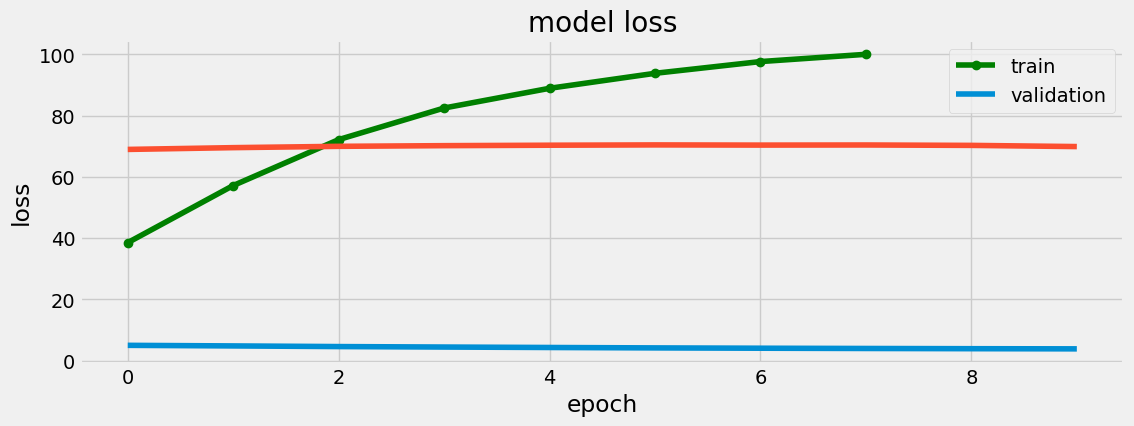

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

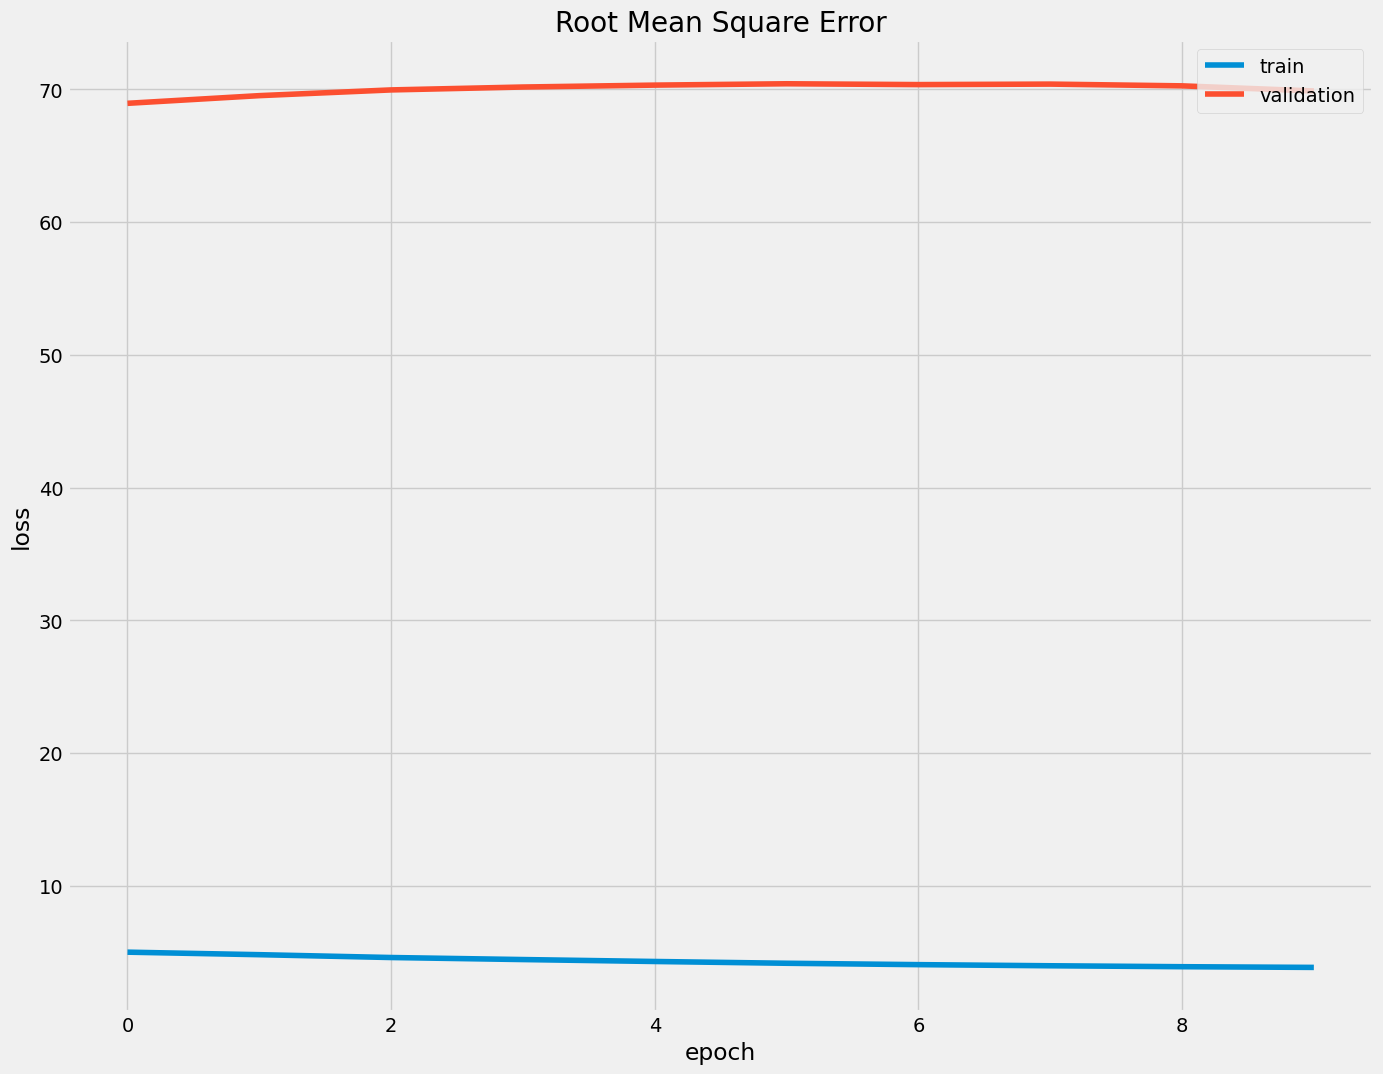

In [46]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Root Mean Square Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [47]:
weapons_df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\weapons.csv')
weapons_df

,Weapon_Name,Weapon_type,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION,ATTACHABLES
0,RGS50,LAUNCHER,90,27,100,62,3,90,65,0,Nothing
1,MGL140,LAUNCHER,90,33,51,76,5,90,65,0,MAGAZINE
2,M79,LAUNCHER,90,27,51,62,1,90,65,0,Nothing
3,GATLING,LMG,55,56,84,62,1200,79,32,0,Nothing
4,M249,LMG,57,59,77,48,100,56,58,0,Nothing
5,CG15,SMG,50,69,71,62,20,60,63,0,"FOREGRIP,MAGAZINE"
6,P90,SMG,48,75,27,48,50,37,63,0,"MAGAZINE,SCOPE,STOCK"
7,MP40,SMG,48,83,22,48,20,17,63,0,"STOCK,MAGAZINE"
8,UMP,SMG,49,75,36,77,48,36,79,63,"SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE"
9,MP5,SMG,48,76,41,77,48,54,66,0,"SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE"


In [48]:
weapons_df.iloc[:,[0,1,10]]

,Weapon_Name,Weapon_type,ATTACHABLES
0,RGS50,LAUNCHER,Nothing
1,MGL140,LAUNCHER,MAGAZINE
2,M79,LAUNCHER,Nothing
3,GATLING,LMG,Nothing
4,M249,LMG,Nothing
5,CG15,SMG,"FOREGRIP,MAGAZINE"
6,P90,SMG,"MAGAZINE,SCOPE,STOCK"
7,MP40,SMG,"STOCK,MAGAZINE"
8,UMP,SMG,"SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE"
9,MP5,SMG,"SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE"


In [49]:
weapons_df.iloc[:, 2:10]

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
0,90,27,100,62,3,90,65,0
1,90,33,51,76,5,90,65,0
2,90,27,51,62,1,90,65,0
3,55,56,84,62,1200,79,32,0
4,57,59,77,48,100,56,58,0
5,50,69,71,62,20,60,63,0
6,48,75,27,48,50,37,63,0
7,48,83,22,48,20,17,63,0
8,49,75,36,77,48,36,79,63
9,48,76,41,77,48,54,66,0


In [50]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [51]:
df = norm_func(weapons_df.iloc[:, 2:10])

In [52]:
df.describe()

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION
count,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01
mean,-8.074349e-17,1.009294e-17,3.532528e-17,6.118843e-17,2.144749e-17,9.083643e-17,7.569702e-18,1.009294e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.250732e+00,-2.665066e+00,-1.692790e+00,-1.980030e+00,-2.558032e-01,-1.727661e+00,-3.126019e+00,-3.502094e-01
25%,-6.713828e-01,-8.037500e-01,-8.237682e-01,-1.538674e-01,-2.306922e-01,-6.330298e-01,-3.473355e-01,-3.502094e-01
50%,-2.577137e-01,-1.833114e-01,1.802472e-01,1.579165e-01,-1.804700e-01,1.488498e-01,-2.547127e-01,-3.502094e-01
75%,1.129295e+00,6.768421e-01,8.805269e-01,7.814842e-01,-8.839606e-02,3.788144e-01,7.178266e-01,-3.502094e-01
max,1.615964e+00,2.016425e+00,1.682052e+00,1.716836e+00,6.440484e+00,1.583829e+00,2.060857e+00,3.125943e+00


In [53]:
enc_df = pd.get_dummies(weapons_df.iloc[:,[0,1,10]]) # dummy variables selection
enc_df.columns

Index(['Weapon_Name_AK', 'Weapon_Name_AN94', 'Weapon_Name_AUG',
       'Weapon_Name_AWM', 'Weapon_Name_BAT', 'Weapon_Name_CG15',
       'Weapon_Name_CROSSBOW', 'Weapon_Name_DESERT_EAGLE', 'Weapon_Name_FAMAS',
       'Weapon_Name_G18', 'Weapon_Name_GATLING', 'Weapon_Name_GRENADE',
       'Weapon_Name_GROZA', 'Weapon_Name_HAND-CANNON', 'Weapon_Name_HEATGUN',
       'Weapon_Name_KAR98K', 'Weapon_Name_KATANA', 'Weapon_Name_M1014',
       'Weapon_Name_M14', 'Weapon_Name_M1873', 'Weapon_Name_M1887',
       'Weapon_Name_M249', 'Weapon_Name_M4A1', 'Weapon_Name_M500',
       'Weapon_Name_M79', 'Weapon_Name_M82B', 'Weapon_Name_MACHETE\n',
       'Weapon_Name_MGL140', 'Weapon_Name_MP40', 'Weapon_Name_MP5',
       'Weapon_Name_P90', 'Weapon_Name_PAN', 'Weapon_Name_RGS50',
       'Weapon_Name_SCAR', 'Weapon_Name_SKS', 'Weapon_Name_SPAS12',
       'Weapon_Name_SVD', 'Weapon_Name_THOMPSON', 'Weapon_Name_TREATMENT_GUN',
       'Weapon_Name_UMP', 'Weapon_Name_USP', 'Weapon_Name_VSS',
       'Weapon_Nam

In [54]:
model_df = pd.concat([df,enc_df], axis=1)

In [55]:
model_df.head(11)

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION,Weapon_Name_AK,Weapon_Name_AN94,...,ATTACHABLES_SILENCER,"ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,Pre-attached-Scope,STOCK","ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE","ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE,STOCK","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE,Pre-attached-Scope","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE,Pre-attached-Scope,STOCK","ATTACHABLES_SILENCER,MUZZLE,Pre-attached-Scope",ATTACHABLES_STOCK,"ATTACHABLES_STOCK,MAGAZINE"
0,1.129295,-1.142171,1.682052,0.781484,-0.239063,1.583829,-0.069467,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.129295,-0.803750,0.028379,1.405052,-0.227902,1.583829,-0.069467,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.129295,-1.142171,0.028379,0.781484,-0.250223,1.583829,-0.069467,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.574049,0.493531,1.142077,0.781484,6.440484,1.179091,-3.126019,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.476715,0.662741,0.905838,0.157916,0.302221,0.332821,-0.717827,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
5,-0.817384,1.226776,0.703348,0.781484,-0.144198,0.479999,-0.254713,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
6,-0.914718,1.565197,-0.781583,0.157916,0.023209,-0.366271,-0.254713,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
7,-0.914718,2.016425,-0.950325,0.157916,-0.144198,-1.102158,-0.254713,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,True
8,-0.866051,1.565197,-0.477847,1.449592,0.012048,-0.403065,1.227252,2.918411,False,False,...,False,False,True,False,False,False,False,False,False,False
9,-0.914718,1.621601,-0.309105,1.449592,0.012048,0.259233,0.023156,-0.350209,False,False,...,False,False,True,False,False,False,False,False,False,False


In [56]:
plt.plot(df,color="green",marker = "o");

In [57]:
model_df_train, model_df_test = train_test_split(model_df, test_size = 0.2,random_state = 457)

In [58]:
model_df_train.iloc[:,0:]

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION,Weapon_Name_AK,Weapon_Name_AN94,...,ATTACHABLES_SILENCER,"ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,Pre-attached-Scope,STOCK","ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE","ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE,STOCK","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE,Pre-attached-Scope","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE,Pre-attached-Scope,STOCK","ATTACHABLES_SILENCER,MUZZLE,Pre-attached-Scope",ATTACHABLES_STOCK,"ATTACHABLES_STOCK,MAGAZINE"
2,1.129295,-1.142171,0.028379,0.781484,-0.250223,1.583829,-0.069467,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
32,1.323962,-0.690943,-1.422803,-0.153867,-0.244643,-1.359718,0.856761,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
24,0.739959,-0.690943,1.074580,-0.153867,-0.200001,0.148850,-0.347335,2.036403,False,False,...,False,True,False,False,False,False,False,False,False,False
39,1.615964,-0.296118,-0.984073,1.405052,-0.244643,-1.359718,-0.347335,2.451466,False,False,...,False,False,False,False,False,False,False,False,False,False
36,1.129295,-1.142171,-1.355306,0.781484,-0.244643,-0.476654,0.856761,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.476715,0.662741,0.905838,0.157916,0.302221,0.332821,-0.717827,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
21,-0.671383,1.113969,0.669599,0.157916,-0.088396,0.259233,-0.347335,-0.350209,False,False,...,False,False,False,True,False,False,False,False,False,False
11,-0.817384,1.678004,-0.579092,0.157916,-0.021433,-0.182299,-0.162090,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
5,-0.817384,1.226776,0.703348,0.781484,-0.144198,0.479999,-0.254713,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
28,-0.476715,0.606338,0.770845,-1.980030,-0.088396,0.259233,-0.347335,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
model_df_test.iloc[:,0:]

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION,Weapon_Name_AK,Weapon_Name_AN94,...,ATTACHABLES_SILENCER,"ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,Pre-attached-Scope,STOCK","ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE","ATTACHABLES_SILENCER,MUZZLE,FOREGRIP,MAGAZINE,SCOPE,STOCK","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE,Pre-attached-Scope","ATTACHABLES_SILENCER,MUZZLE,MAGAZINE,Pre-attached-Scope,STOCK","ATTACHABLES_SILENCER,MUZZLE,Pre-attached-Scope",ATTACHABLES_STOCK,"ATTACHABLES_STOCK,MAGAZINE"
37,1.469963,-0.296118,-1.152815,-0.465651,-0.227902,-1.359718,-0.532581,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
27,-0.671383,0.775548,0.332115,-0.153867,-0.088396,-0.182299,-0.347335,-0.350209,False,False,...,False,False,True,False,False,False,False,False,False,False
12,-0.038712,-0.860154,-1.524048,-1.980030,-0.255803,-1.359718,2.060857,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
33,-1.060718,-0.183311,-0.714086,1.716836,-0.188840,0.369616,0.949384,-0.350209,False,False,...,False,False,False,False,True,False,False,False,False,False
17,-0.330714,0.606338,0.163373,0.024295,-0.088396,0.038467,-0.347335,-0.350209,False,True,...,False,False,False,False,False,False,False,False,False,False
8,-0.866051,1.565197,-0.477847,1.449592,0.012048,-0.403065,1.227252,2.918411,False,False,...,False,False,True,False,False,False,False,False,False,False
16,-0.038712,-0.860154,-1.524048,-1.980030,-0.255803,-1.359718,2.060857,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.574049,0.493531,1.142077,0.781484,6.440484,1.179091,-3.126019,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,False
7,-0.914718,2.016425,-0.950325,0.157916,-0.144198,-1.102158,-0.254713,-0.350209,False,False,...,False,False,False,False,False,False,False,False,False,True


In [60]:
X_train = model_df_train.iloc[:,0:9]
y_train = model_df_train.iloc[:,8]
X_test = model_df_test.iloc[:,0:9]
y_test = model_df_test.iloc[:,8]

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (35, 9)
X_test (9, 9)
y_train (35,)
y_test (9,)


In [61]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # Minimium amount of change to count as an improvement
    patience=400, # How many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.8571 - val_loss: 0.6928
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 0.6926 - val_accuracy: 0.8571 - val_loss: 0.6924
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 0.6921 - val_accuracy: 0.8571 - val_loss: 0.6920
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 0.6915 - val_accuracy: 0.8571 - val_loss: 0.6916
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 0.6910 - val_accuracy: 0.8571 - val_loss: 0.6912
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 0.6904 - val_accuracy: 0.8571 - val_loss: 0.6908
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 0.6898 - val_accuracy: 0.8571 - val_loss: 0.6904
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 1.0000 - loss: 0.6892 - val_accuracy: 0.8571 - val_loss: 0.6899


In [62]:
eval_score_test = model.evaluate(X_test,y_test,verbose = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.1882


In [63]:
print ("Accuracy: %.3f%%" %(eval_score_test[1]*100)) # Test Accuracy

Accuracy: 100.000%


In [64]:
eval_score_train = model.evaluate(X_train,y_train,verbose=0)

In [65]:
print ("Accuracy: %.3f%%" %(eval_score_train[1]*100)) # Train Accuracy

Accuracy: 97.143%


In [66]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


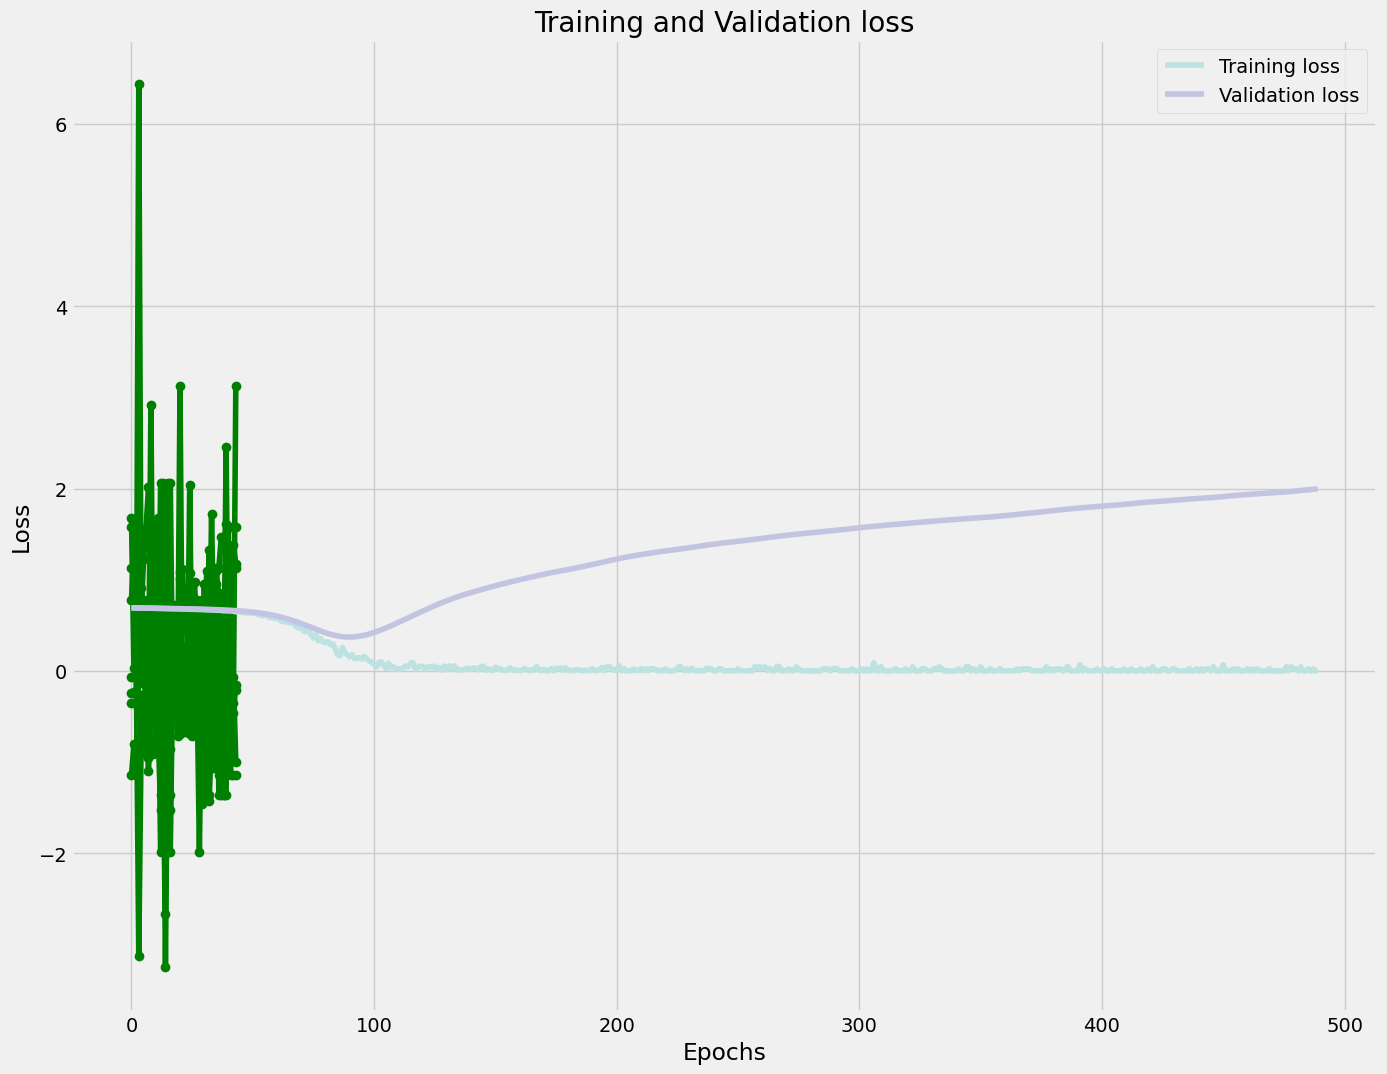

In [67]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

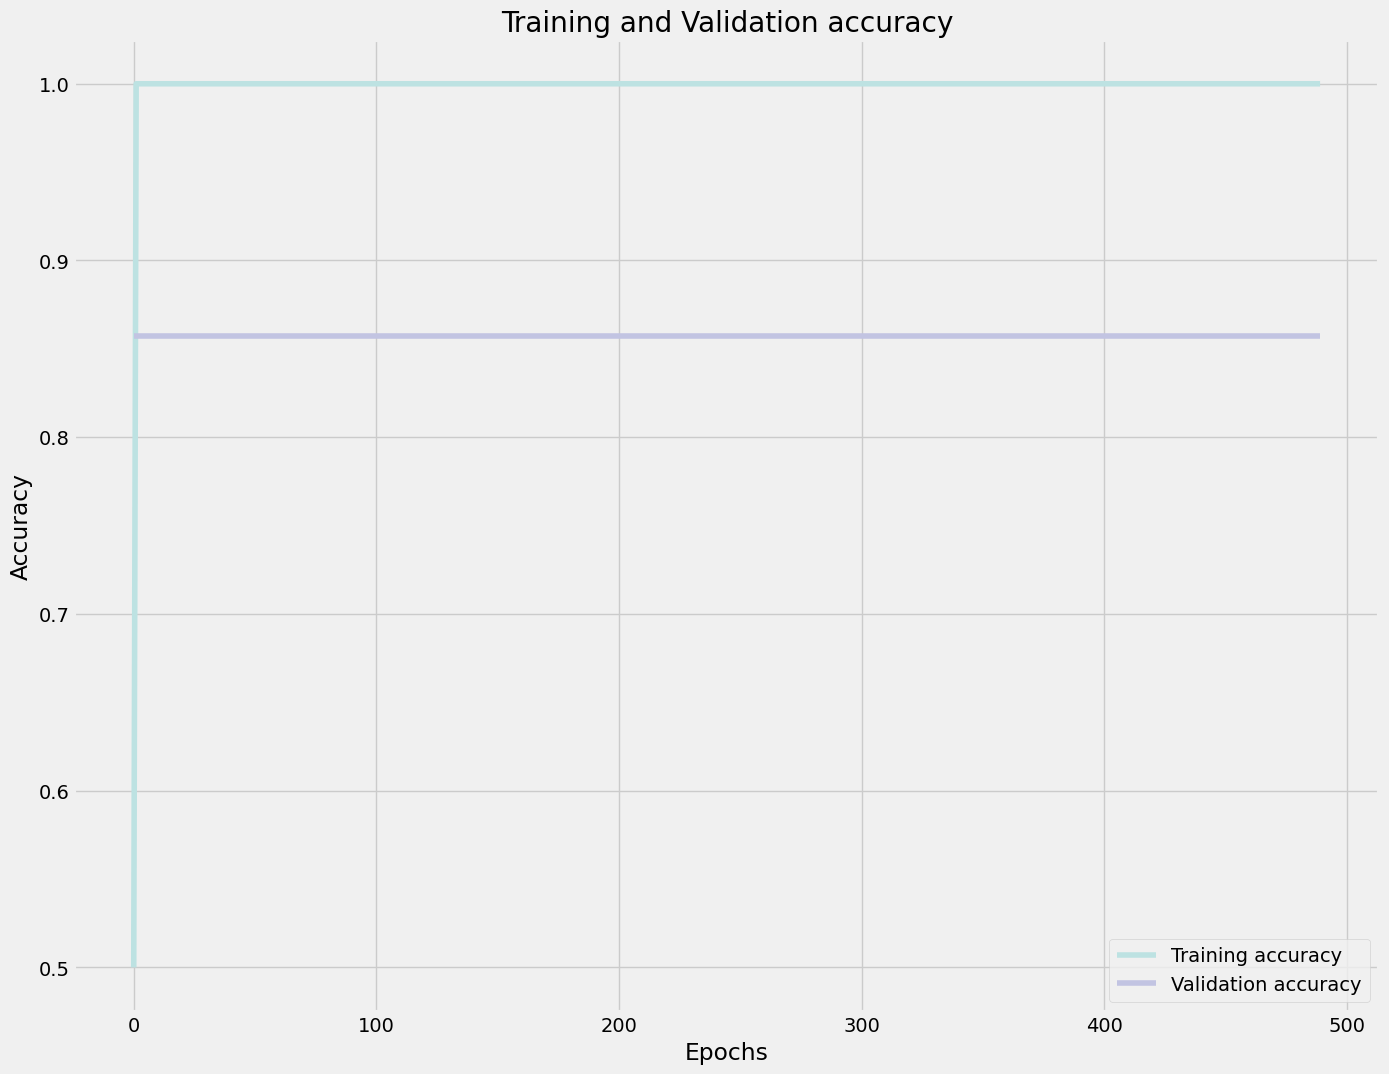

In [70]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.1882


In [72]:
y_pred=model.predict(X_test)

error=np.mean(y_test)-np.mean(y_pred)
error

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


-0.16992078721523285

In [73]:
model_df_test.iloc[:,11]

37    False
27    False
12    False
33    False
17    False
8     False
16    False
3     False
7     False
Name: Weapon_Name_AWM, dtype: bool

In [74]:
model_df_train.iloc[:,0:12]

,DAMAGE,RATE_OF_FIRE,RANGE,RELOAD SPEED,MAGAZINE,ACCURACY,MOVEMENT_SPEED,ARMOR_PENETRATION,Weapon_Name_AK,Weapon_Name_AN94,Weapon_Name_AUG,Weapon_Name_AWM
2,1.129295,-1.142171,0.028379,0.781484,-0.250223,1.583829,-0.069467,-0.350209,False,False,False,False
32,1.323962,-0.690943,-1.422803,-0.153867,-0.244643,-1.359718,0.856761,-0.350209,False,False,False,False
24,0.739959,-0.690943,1.074580,-0.153867,-0.200001,0.148850,-0.347335,2.036403,False,False,False,False
39,1.615964,-0.296118,-0.984073,1.405052,-0.244643,-1.359718,-0.347335,2.451466,False,False,False,False
36,1.129295,-1.142171,-1.355306,0.781484,-0.244643,-0.476654,0.856761,-0.350209,False,False,False,False
4,-0.476715,0.662741,0.905838,0.157916,0.302221,0.332821,-0.717827,-0.350209,False,False,False,False
21,-0.671383,1.113969,0.669599,0.157916,-0.088396,0.259233,-0.347335,-0.350209,False,False,False,False
11,-0.817384,1.678004,-0.579092,0.157916,-0.021433,-0.182299,-0.162090,-0.350209,False,False,False,False
5,-0.817384,1.226776,0.703348,0.781484,-0.144198,0.479999,-0.254713,-0.350209,False,False,False,False
28,-0.476715,0.606338,0.770845,-1.980030,-0.088396,0.259233,-0.347335,-0.350209,False,False,False,False


In [75]:
model_df_test.iloc[:,11]

37    False
27    False
12    False
33    False
17    False
8     False
16    False
3     False
7     False
Name: Weapon_Name_AWM, dtype: bool

In [77]:
X_train_AWM = model_df_train.iloc[:,0:12]
y_train_AWM = model_df_train.iloc[:,11]
X_test_AWM = model_df_test.iloc[:,0:12]
y_test_AWM = model_df_test.iloc[:,11]

print("X_train",X_train_AWM.shape)
print("X_test",X_test_AWM.shape)
print("y_train",y_train_AWM.shape)
print("y_test",y_test_AWM.shape)

X_train (35, 12)
X_test (9, 12)
y_train (35,)
y_test (9,)


In [78]:
# Initializing Model
model = Sequential()

# Adding Layers
model.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


#Compile Model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
history = model.fit(X_train_AWM, y_train_AWM, batch_size = 32, epochs = 500, validation_split=0.2,verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8929 - loss: 0.6729 - val_accuracy: 0.8571 - val_loss: 0.6753
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8929 - loss: 0.6670 - val_accuracy: 0.8571 - val_loss: 0.6716
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8929 - loss: 0.6564 - val_accuracy: 0.8571 - val_loss: 0.6678
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7857 - loss: 0.6603 - val_accuracy: 0.8571 - val_loss: 0.6641
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9286 - loss: 0.6524 - val_accuracy: 0.8571 - val_loss: 0.6604
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 0.6412 - val_accuracy: 0.8571 - val_loss: 0.6568
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.6359 - val_accuracy: 0.8571 - val_loss: 0.6532
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9643 - loss: 0.6317 - val_accuracy: 0.8571 - val_

In [80]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs= range(1,len(acc)+1)

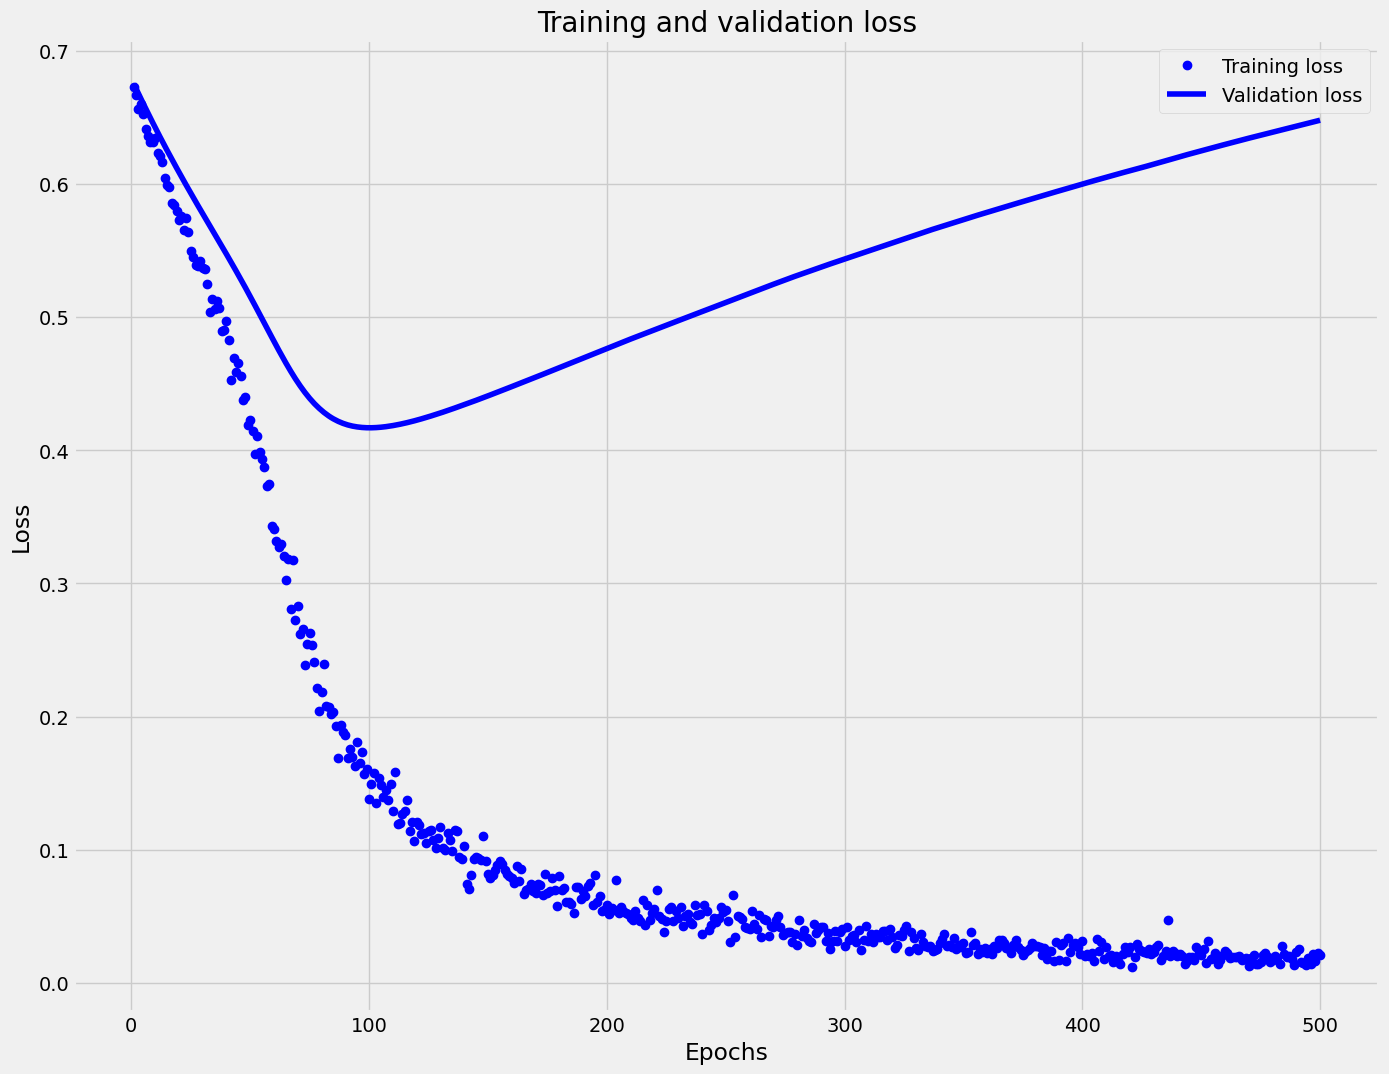

In [82]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

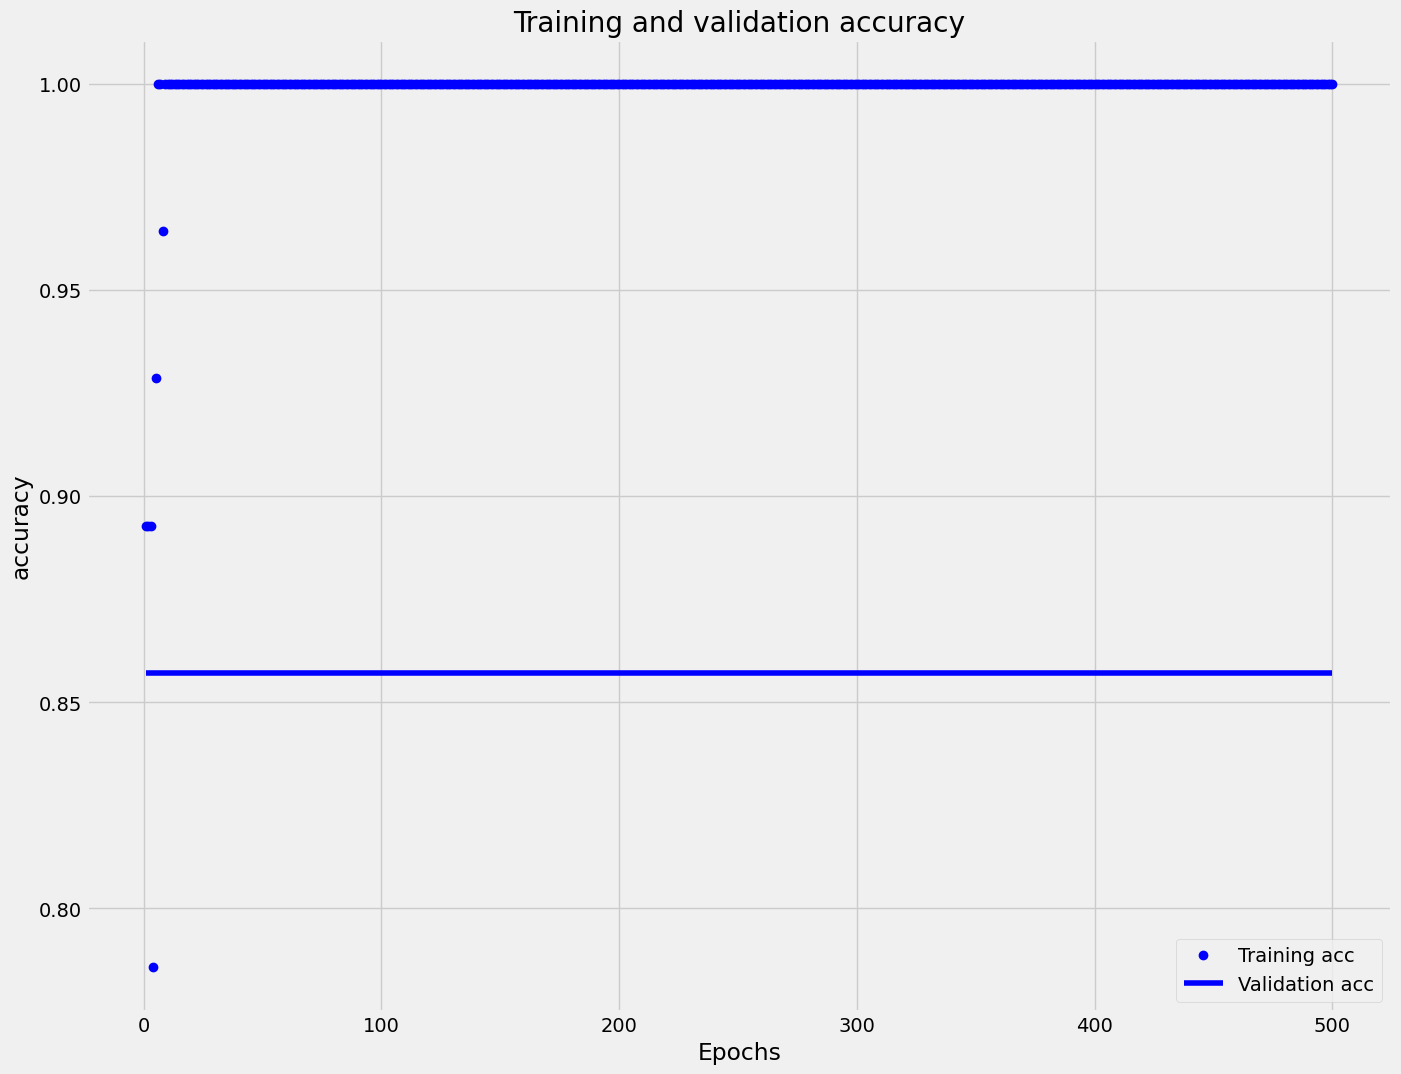

In [83]:
history_dict = history.history

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [84]:
model=Sequential()
model.add(Dense(model_df_test.shape[1],activation='relu',input_dim=12))
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_AWM, y_train_AWM, epochs=20, batch_size=50000)

Epoch 1/20


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3143 - loss: 0.7174
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6286 - loss: 0.6646
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8286 - loss: 0.6160
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9714 - loss: 0.5713
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9714 - loss: 0.5301
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9714 - loss: 0.4921
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9714 - loss: 0.4574
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9714 - loss: 0.4258
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9714 - loss: 0.3968
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9714 - loss: 0.3700
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9714 - loss: 0.3453
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9714 - loss: 0.3227
Epoch 13/20
1

In [85]:
test_mse_score, test_mae_score = model.evaluate(X_test_AWM, y_test_AWM)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 1.0000 - loss: 0.1011


In [86]:
y_pred_AWM=model.predict(X_test_AWM)

error_AWM=np.mean(y_test_AWM)-np.mean(y_pred_AWM)
error_AWM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


-0.09292790293693542

In [87]:
eval_score_test = model.evaluate(X_test_AWM,y_test_AWM,verbose = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.1011


In [88]:
eval_score_train = model.evaluate(X_train_AWM,y_train_AWM,verbose = 1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9705 - loss: 0.1922
